# Rodrigo_Mesquita_DR3_AT
## Desenvolvimento Front-End com Python (com Streamlit) [24E3_1]

#### Notebook disponível em: https://github.com/rodrigo1992-cmyk/DR1_AT

#### Deploy do App disponível em: 

In [ ]:
streamlit run app.py --server.port=8086 --browser.serverAddress='177.192.12.238

## 1. Preparar o ambiente de desenvolvimento:
* Crie um ambiente virtual para seu projeto utilizando uma ferramenta como venv, virtualenv ou pipenv.
* Instale as bibliotecas necessárias (Streamlit, statsbombpy, mplsoccer, matplotlib, entre outras).

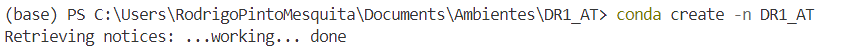

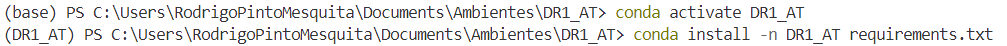

## 2. Estruturar o projeto:
* Crie um repositório no GitHub para hospedar o código do seu projeto.
* Garanta que o repositório contenha um arquivo requirements.txt com as dependências necessárias para rodar o projeto.
* Organize o código de forma clara, criando funções separadas para carregar os dados, gerar as visualizações e construir a interface do dashboard.

In [ ]:
# Repositório Github: https://github.com/rodrigo1992-cmyk/DR1_AT

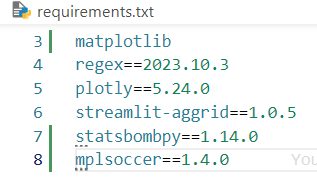

## 3. Definir a estrutura do dashboard:
* Desenvolva uma interface interativa em Streamlit que permita ao usuário selecionar:
  * Um campeonato específico.
  * Uma temporada (ano).
  * Uma partida ou jogador para análise.
* Organize o layout do dashboard em colunas, usando columns, sidebars, containers e tabs para melhorar a usabilidade.

## 4. Obter dados e exibir informações básicas
* Use a biblioteca StatsBombPy para carregar dados de competições, temporadas, partidas e jogadores.
* Mostre, em uma página do dashboard, as seguintes informações:
* Nome da competição, temporada e partida selecionada.
* Estatísticas básicas da partida (gols, chutes, passes, etc.).
* Um DataFrame exibindo os eventos da partida, como passes, finalizações e desarmes.

## 5. Criar visualizações de dados
* Utilize a biblioteca mplsoccer para gerar um mapa de passes e mapa de chutes para uma partida específica. Garanta que o gráfico seja  interativo, com legendas e informações que ajudem a interpretar os dados.
* Crie visualizações adicionais com Matplotlib e Seaborn para explorar relações entre as estatísticas de uma partida ou de um jogador (por exemplo, relação entre número de passes e gols).
* Utilize a biblioteca mplsoccer para novas visualizações de acordo com sua galeria (https://mplsoccer.readthedocs.io/en/latest/gallery/index.html)

## 6. Adicionar interatividade
* Adicione seletores de jogadores e botões de filtro que permitam ao usuário visualizar apenas eventos relacionados a um jogador específico.
* Inclua botões de download que permitam ao usuário baixar os dados filtrados da partida em formato CSV.
* Utilize barras de progresso e spinners para informar ao usuário que os dados estão sendo carregados ou processados.

## 7. Incluir métricas e indicadores
* Exiba indicadores numéricos usando a função metric() do Streamlit para mostrar, por exemplo:
* Total de gols da partida.
* Quantidade de passes bem-sucedidos de um jogador.
* Taxa de conversão de chutes em gol.
* Personalize esses indicadores com cores que realcem os valores mais importantes.

## 8. Criar formulários interativos
* Desenvolva formulários simples que permitam ao usuário escolher, por exemplo, a quantidade de eventos a serem visualizados, o intervalo de tempo de uma partida ou a comparação entre dois jogadores.
* Use elementos como caixas de texto, dropdowns, radio buttons e checkboxes para tornar a interação mais fluida.

## 9. Implementar funcionalidades avançadas
* Utilize o Cache do Streamlit para otimizar o carregamento de dados, especialmente se estiver utilizando bases de dados grandes.
* Armazene o estado da sessão do usuário utilizando Session State, garantindo que a interação do usuário não seja perdida quando ele navegar entre páginas.

## 10. Publicar o projeto
* Realize o deploy da aplicação utilizando o Streamlit Community Cloud. Verifique se o deploy foi bem-sucedido e que todas as funcionalidades estão funcionando conforme esperado.
* Compartilhe o link da aplicação publicada e o repositório no GitHub.